In [106]:
# Import measure related functions
from spiketools.measures.spikes import (compute_firing_rate, compute_isis,
                                        compute_cv, compute_fano_factor)
from spiketools.measures.conversions import (convert_times_to_train, convert_train_to_times,
                                             convert_isis_to_times)
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.data import plot_lines
# Import simulation functions
from spiketools.sim import sim_spiketimes

# Import plot functions
from spiketools.plts.spikes import plot_isis
from spiketools.plts.trials import plot_rasters
from fooof.plts import plot_spectra

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import warnings
warnings.filterwarnings("ignore")



In [124]:
# folder of the results
path_files = Path('/home/b1044271/Columbia/Results/PSDs/Pz/')

# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

In [125]:
# a function to generate freq files
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file          

In [126]:
# get frequencies for all dimensions (x axis).
path_freqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')
f_files = list(path_freqs.iterdir())
f_files = sorted(f_files)

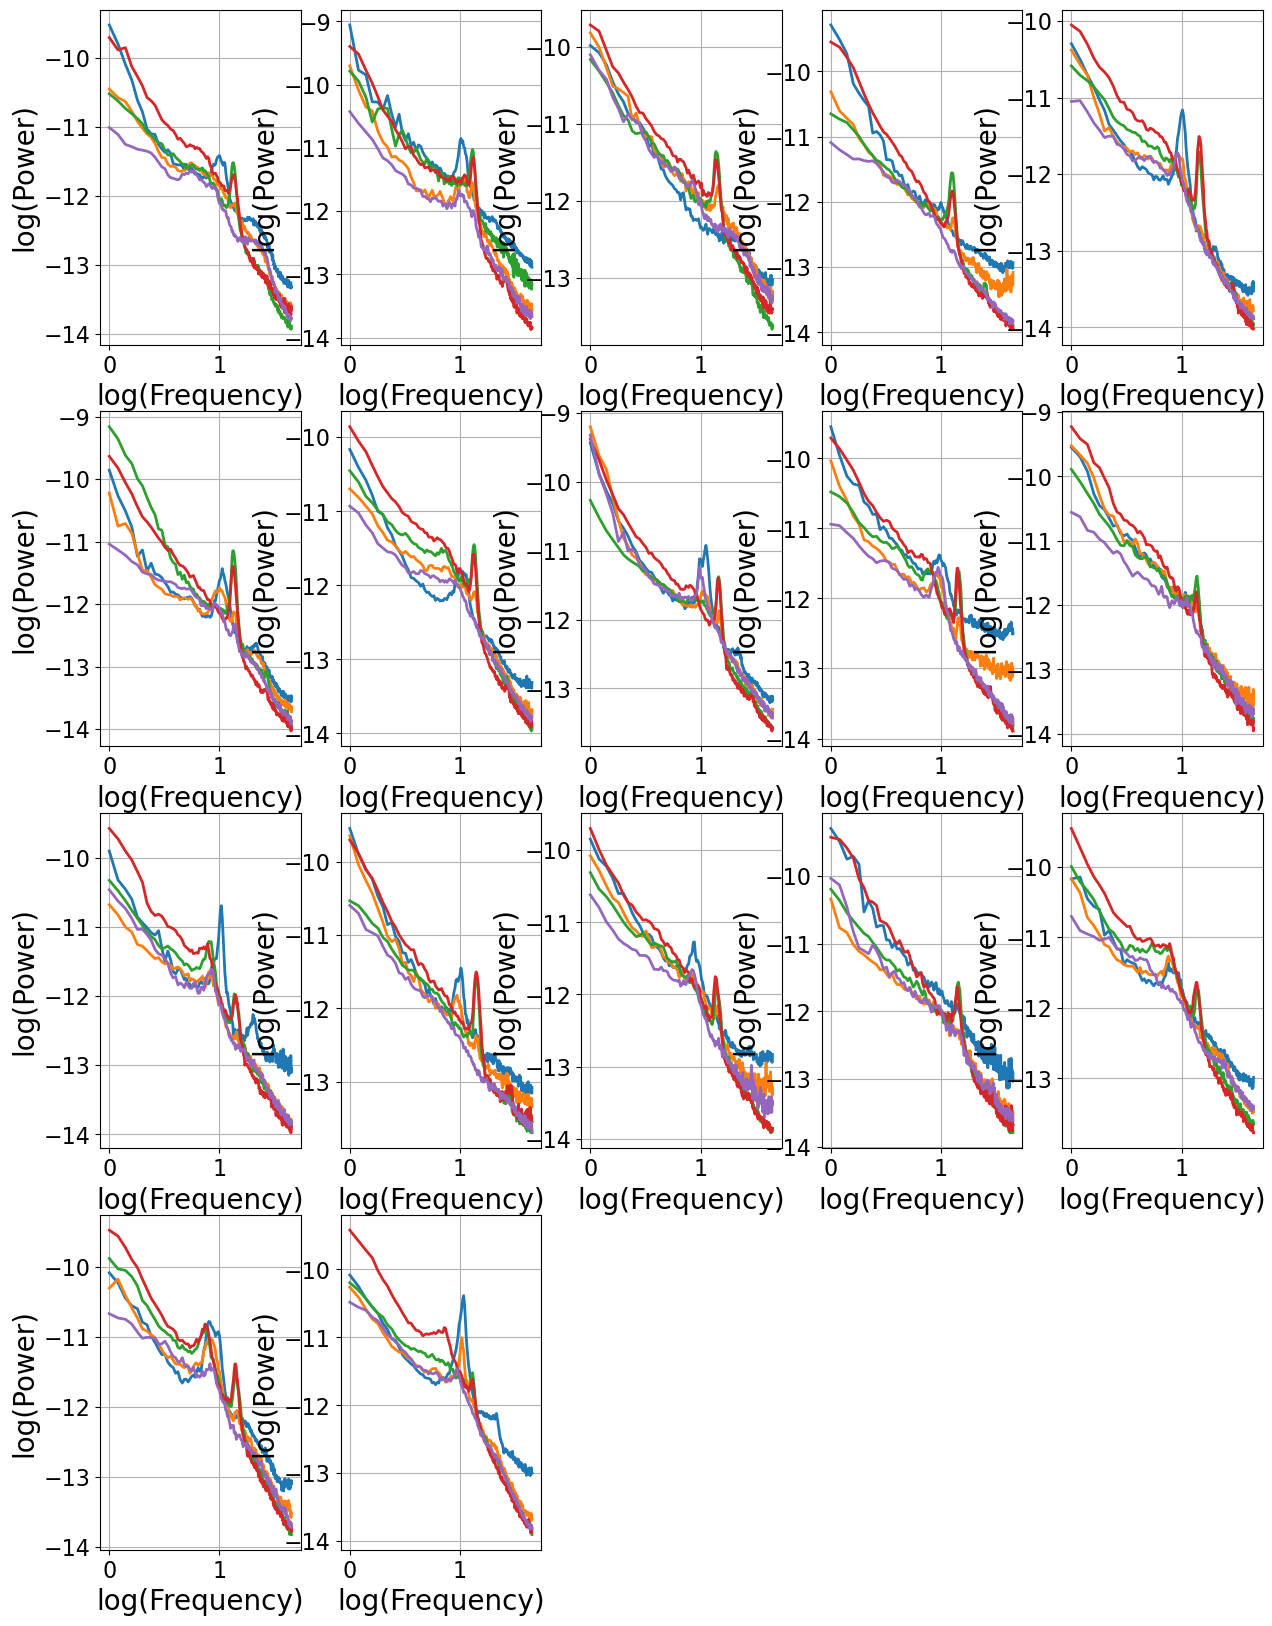

In [127]:
N1_psd={}
N2_psd={}
N3_psd={}
AW_psd={}
RM_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(15, 20)))


i = 0
freqs_d = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))
for subj in sbj_folders:  
    N1s = np.load(path_files / subj / 'N1' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N2s = np.load(path_files / subj /'N2' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N3s = np.load(path_files / subj /'N3' / (T_PARAM + '_' + F_PARAM + '.npy'))
    AWs = np.load(path_files / subj /'AW' / (T_PARAM + '_' + F_PARAM + '.npy'))
    RMs = np.load(path_files / subj /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(N1s),len(N2s),len(N3s),len(AWs),len(RMs)])
    
    N1_psd[i] = np.mean(N1s[np.random.choice(len(N1s), size=epoch_no, replace=False),:],0)
    N2_psd[i] = np.mean(N2s[np.random.choice(len(N2s), size=epoch_no, replace=False),:],0)
    N3_psd[i] = np.mean(N3s[np.random.choice(len(N3s), size=epoch_no, replace=False),:],0)
    AW_psd[i] = np.mean(AWs[np.random.choice(len(AWs), size=epoch_no, replace=False),:],0)
    RM_psd[i] = np.mean(RMs[np.random.choice(len(RMs), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
lN1 = list(iter(N1_psd.values())) #convert values to list
lN2 = list(iter(N2_psd.values())) #convert values to list
lN3 = list(iter(N3_psd.values())) #convert values to list
lAW = list(iter(AW_psd.values())) #convert values to list
lRM = list(iter(RM_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[lAW[S],lN1[S],lN2[S],lN3[S],
        lRM[S]], log_freqs=True, log_powers=True, ax=next(axes))
 

#plt.savefig("Group_PSDs_Trial2_Oz.svg", dpi = 600 )

In [162]:
# folder of the results
path_folders = Path('/home/b1044271/Columbia/Results/PSDs/Pz')
path_files   = Path('/home/b1044271/Columbia/Results/PSDs')

# Get names of all subject folder
sbj_folders = list(path_folders.iterdir())
sbj_folders = sorted(sbj_folders)

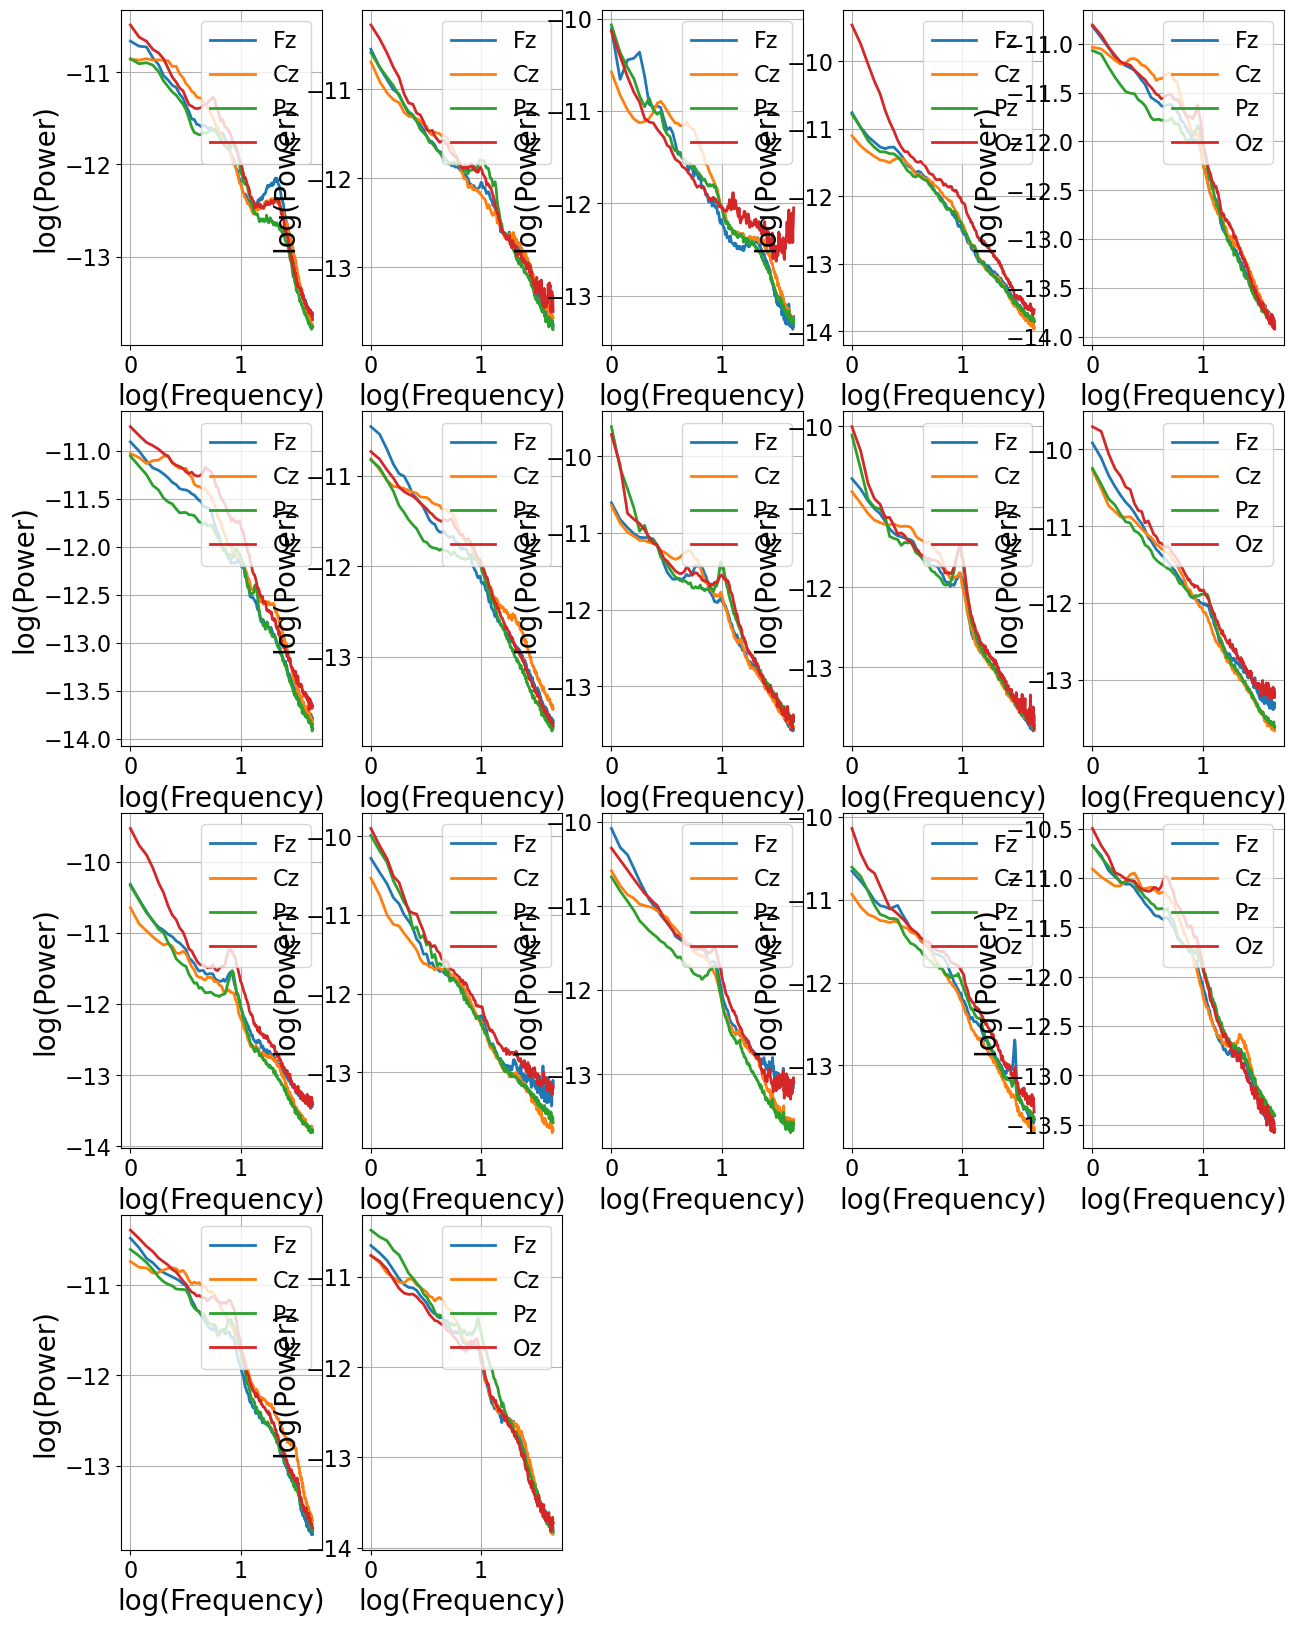

In [180]:
L1_psd={}
L2_psd={}
L3_psd={}
L4_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(15, 20)))


freqs_d = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))

i = 0
for subj in sbj_folders:  
    L1 = np.load(path_files / 'Fz' /os.path.basename(subj) / 'RM'/ (T_PARAM + '_' + F_PARAM + '.npy'))
    L2 = np.load(path_files / 'Cz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L3 = np.load(path_files / 'Pz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L4 = np.load(path_files / 'Oz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(L1),len(L2),len(L3),len(L4)])
    
    L1_psd[i] = np.mean(L1[np.random.choice(len(L1), size=epoch_no, replace=False),:],0)
    L2_psd[i] = np.mean(L2[np.random.choice(len(L2), size=epoch_no, replace=False),:],0)
    L3_psd[i] = np.mean(L3[np.random.choice(len(L3), size=epoch_no, replace=False),:],0)
    L4_psd[i] = np.mean(L4[np.random.choice(len(L4), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
loc1 = list(iter(L1_psd.values())) #convert values to list
loc2 = list(iter(L2_psd.values())) #convert values to list
loc3 = list(iter(L3_psd.values())) #convert values to list
loc4 = list(iter(L4_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[loc1[S],loc2[S],loc3[S],loc4[S]
        ], log_freqs=True, log_powers=True, ax=next(axes), labels=['Fz','Cz','Pz','Oz'])

plt.savefig("Group_PSDs_Trial2_Oz.svg", dpi = 600 )

In [161]:
path_files / 'Fz' /os.path.basename(subj) / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Pz/Fz/VP01/RM/T5_F45.npy')

In [170]:
plot_spectra?

In [142]:
path_files / 'Fz' /subj / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/RM/T5_F45.npy')

In [139]:
path_files / 'Fz' /subj / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Pz/VP19/RM/T5_F45.npy')

In [133]:
np.shape(np.mean(L1[np.random.choice(len(N1s), size=epoch_no, replace=False),:],0))

(221,)

In [136]:
loc1


[array([1.39760436e-11, 1.23704017e-11, 1.26813180e-11, 1.19466558e-11,
        1.01582867e-11, 8.04296387e-12, 6.97260789e-12, 6.11486579e-12,
        5.65751252e-12, 5.01004995e-12, 4.51714190e-12, 3.90864644e-12,
        3.15329955e-12, 2.53843803e-12, 2.21852672e-12, 2.16521239e-12,
        2.09392549e-12, 2.10886015e-12, 2.23208207e-12, 2.17232165e-12,
        2.19453824e-12, 2.29066211e-12, 2.35298948e-12, 2.41953508e-12,
        2.36996116e-12, 2.25406057e-12, 2.10389057e-12, 1.97557598e-12,
        1.82978639e-12, 1.73452883e-12, 1.65699790e-12, 1.57679951e-12,
        1.54493031e-12, 1.48690058e-12, 1.44955566e-12, 1.43169619e-12,
        1.59440991e-12, 1.73059638e-12, 1.62152334e-12, 1.62698578e-12,
        1.46090329e-12, 1.37512905e-12, 1.31204247e-12, 1.18194401e-12,
        9.89293506e-13, 8.29749676e-13, 7.83109030e-13, 7.34237010e-13,
        6.51464517e-13, 6.29207224e-13, 6.06156085e-13, 6.35218422e-13,
        6.34926770e-13, 5.45043654e-13, 4.96647143e-13, 4.725123

In [138]:
L2


array([[3.62127678e-11, 5.70453342e-11, 7.76105011e-11, ...,
        9.19970932e-15, 9.08488992e-15, 1.95630503e-14],
       [5.59234690e-11, 3.16656420e-11, 1.97627592e-11, ...,
        1.40878743e-14, 7.58171484e-15, 7.39431629e-15],
       [3.25623348e-11, 6.42956035e-11, 7.04526196e-11, ...,
        1.40370378e-14, 1.24200544e-14, 1.33675818e-14],
       ...,
       [2.26202446e-11, 3.23492613e-11, 2.50977355e-11, ...,
        1.70190459e-14, 1.91064740e-14, 1.11466105e-14],
       [7.19755969e-11, 2.85442039e-11, 2.32399246e-11, ...,
        1.12772423e-14, 2.59517734e-14, 1.11167183e-14],
       [2.66620854e-11, 1.30577810e-11, 1.55729707e-11, ...,
        2.11412213e-14, 1.39846332e-14, 2.12101844e-14]])